## Sebastian Shaji

## Milestone 2

### Research question/interests

The research aims to determine the fastest-growing sectors among the top 1000 companies in Europe using growth rate and revenue data from 2017 and 2020. The study will analyze the data to speculate on the sectors that have experienced the highest increase in growth rate from the year 2017 to the year 2020. The research results will provide insight into the business landscape in Europe and help companies understand which industries have performed well. 

## Milestone 3

In [1]:
# loading dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.read_csv("../data/raw/FT1000.csv")

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,997,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,998,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,999,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012


In [2]:
df = pd.read_csv("../data/raw/FT1000.csv")
df

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,997,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,998,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,999,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012


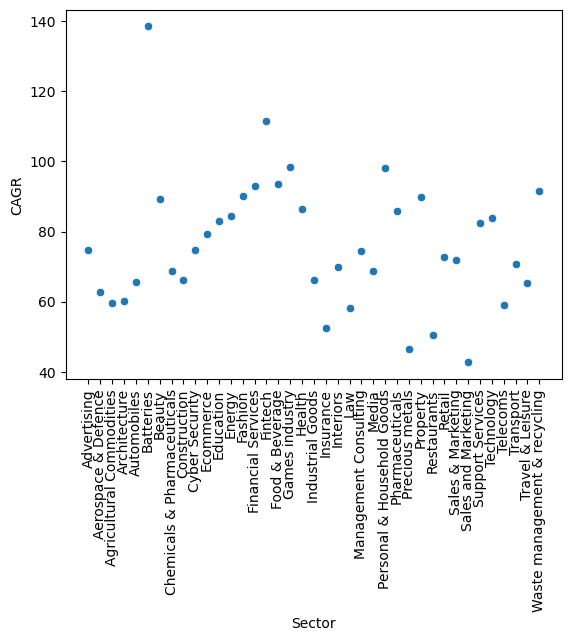

In [12]:
## CAGR of Each Sector vs Sector
sns.scatterplot(x='Sector',y='CAGR',data=df)
plt.xlabel('Sector')
plt.ylabel('CAGR')
plt.xticks(rotation=90)
None


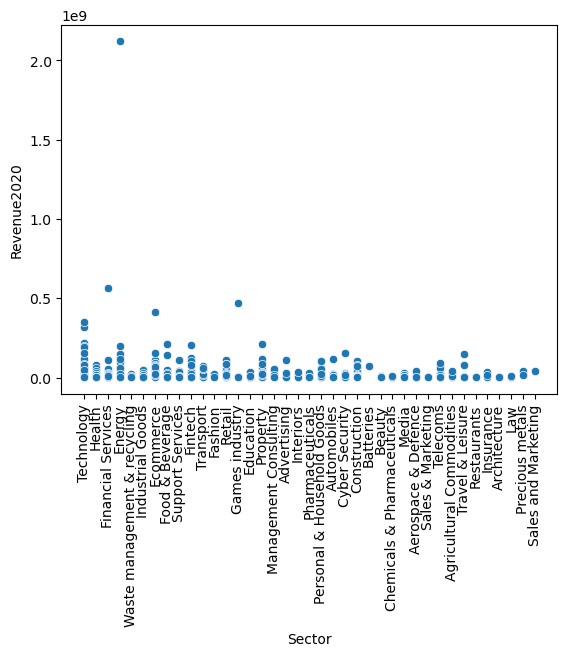

In [4]:
## Revenue 2020 vs Sector
sns.scatterplot(x='Sector',y='Revenue2020',data=df)
plt.xlabel('Sector')
plt.ylabel('Revenue2020')
plt.xticks(rotation=90)
None

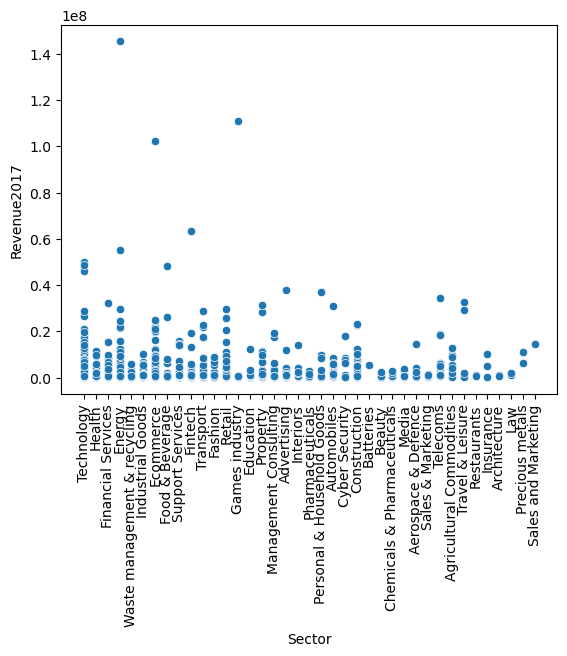

In [5]:
## Revenue 2017 vs Sector
sns.scatterplot(x='Sector',y='Revenue2017',data=df)
plt.xlabel('Sector')
plt.ylabel('Revenue2017')
plt.xticks(rotation=90)
None

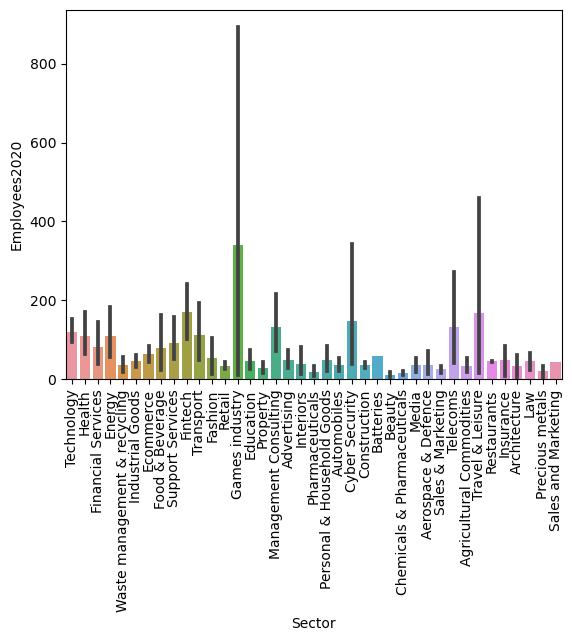

In [6]:
## Employees in 2020 vs Sector
sns.barplot(data=df, x='Sector', y='Employees2020')
plt.xticks(rotation=90)
None

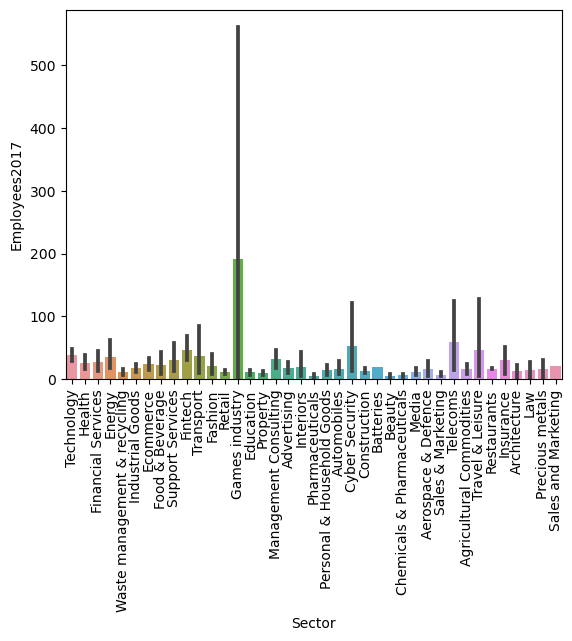

In [7]:
## Employees in 2017 vs Sector
sns.barplot(data=df, x='Sector', y='Employees2017')
plt.xticks(rotation=90)
None

## Milestone 4

In [8]:
# We first look for delimeters by running the following code:

delimiters = [',', ';', '\t', '|']

for delimiter in delimiters:
    try:
        df = pd.read_csv(pd.compat.StringIO(df.to_csv(index=False)), delimiter=delimiter)
        print(f"Delimiter found: '{delimiter}'")
        break
    except:
        pass
    
# No Delimeters found.

# MC 1 - Dropping Rank as redundant and I am now looking to delete all blank values in the data:
df_new = (df.copy().drop(['Rank','Ranked2021','Ranked2020','Country', 'FoundingYear'], axis=1).dropna(axis=0).dropna(axis=1)) 

# We can confirm that are no empty values in the data.

# Dropping companies that had no CAGR over the given period of time
df_new = df_new[df['CAGR'] > 0]

# Renaming Rows
column_labels = {'Name':'Name',
             'Sector':'Sector',
             'CAGR':'CAGR %',
             'Revenue2020':'2020 Revenue ($)',
             'Revenue2017':'2017 Revenue ($)',
             'Employees2020':'Employees in 2020',
             'Employees2017':'Employees in 2017',
             }
df_new.rename(columns= column_labels, inplace=True)


# I sorted the data by the sector to better answer my questions:

df_new = df_new.groupby("Sector").mean()
df_new

## I added the row Change % in Revenue to see the increase or decrease in revenue in percentage over the period of time.

df_new['Change % in Revenue'] = ((df_new['2020 Revenue ($)'] - df_new['2017 Revenue ($)']) / df_new['2017 Revenue ($)']) * 100
df_new['Change in No. of Employees'] = (df_new['Employees in 2020'] - df_new['Employees in 2017'])

df_new = df_new.sort_values(by='CAGR %', ascending=False)
df_new = df_new.sort_values(by='Change % in Revenue', ascending=False)
df_new = df_new.sort_values(by='Change in No. of Employees', ascending=False)
df_new


,CAGR %,2020 Revenue ($),2017 Revenue ($),Employees in 2020,Employees in 2017,Change % in Revenue,Change in No. of Employees
Sector,,,,,,,
Games industry,98.537500,1.200823e+08,2.809960e+07,339.000000,192.000000,327.345014,147.000000
Fintech,111.459615,3.214180e+07,5.455762e+06,169.500000,47.000000,489.134853,122.500000
Travel & Leisure,65.230000,3.440419e+07,9.353581e+06,167.428571,46.714286,267.818312,120.714286
Management Consulting,74.510909,1.541553e+07,3.720796e+06,132.318182,31.772727,314.307271,100.545455
Cyber Security,74.656000,2.461367e+07,4.406390e+06,148.400000,53.400000,458.590456,95.000000
Health,86.522558,1.264009e+07,2.430201e+06,110.232558,26.000000,420.125390,84.232558
Technology,83.933636,1.919595e+07,3.576332e+06,119.545455,37.813397,436.749586,81.732057
Transport,70.847857,1.578191e+07,4.878338e+06,112.107143,37.035714,223.509991,75.071429
Energy,84.310238,8.358919e+07,1.065395e+07,109.095238,36.000000,684.584415,73.095238


In [9]:
import project_functions3 as pt
pt.load_and_process('../data/raw/FT1000.csv')

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = (
pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T2-data301/project-group43/main/data/raw/FT1000.csv?token=GHSAT0AAAAAAB5TSZLNNBEW7YFSUBVEBV2WZBRYPRQ")
    .drop(columns=['Ranked2021', 'Ranked2020', 'Country', 'FoundingYear'])
    .groupby('Sector')
    .mean()
)
df

,Rank,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017
Sector,,,,,,
Advertising,491.181818,74.794242,9.761134e+06,2.621346e+06,47.636364,17.121212
Aerospace & Defence,605.666667,62.668333,1.153957e+07,3.874833e+06,36.833333,16.000000
Agricultural Commodities,558.428571,59.501429,2.245109e+07,6.264134e+06,33.285714,16.000000
Architecture,513.000000,60.265000,3.738828e+06,8.986780e+05,33.500000,12.500000
Automobiles,562.307692,65.572692,1.453354e+07,3.677199e+06,37.076923,16.769231
Batteries,93.000000,138.520000,7.406541e+07,5.581858e+06,58.000000,19.000000
Beauty,443.400000,89.174000,5.107593e+06,9.889156e+05,11.800000,5.400000
Chemicals & Pharmaceuticals,517.750000,68.720000,4.545890e+06,1.197377e+06,15.750000,6.250000
Construction,541.123596,66.093258,1.099944e+07,2.476486e+06,34.876404,13.865169


In [11]:
df_new.to_csv('../data/processed/processed.csv')